---------------------------------
### LINEAR REGRESSION
### STEP 1: LIBRARIES IMPORT ###
---------------------------------

In [109]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

------------------------------
### STEP 2: IMPORT DATASET ###
------------------------------

In [102]:
# Read semicolon separated data
data = pd.read_csv('student-mat.csv', sep=";")
# Print the names of the columns
print(data.columns)
print(data.shape)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
(395, 33)


---------------------------------------------------
### STEP 3: CREATE TESTING AND TRAINING DATASET ###
---------------------------------------------------

In [103]:
#Trim the data to only look at relevant features
features = ["G1", "G2", "G3", "studytime", "failures", "absences"]
data = data[features]

# Variable to be predicted is "G3" -> total overall score
predict = "G3"

X = np.array(data.drop([predict], 1))
y = np.array(data[predict])

-------------------------------
### STEP 4: TRAIN THE MODEL ###
-------------------------------

In [104]:
best = 0
# Train the model 30 times to increase accuracy
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    #Training our linear model
    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test) # acc stands for accuracy 
    if acc > best:
        best = acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)
print("Best accuracy of training model = ", best)

predictions = linear.predict(x_test)

print("predictions: ",predictions)

Best accuracy of training model =  0.9415936259524196
predictions:  [10.23256845 -0.52055483 14.85488601 10.23609073 16.19212916 12.33737394
  6.78238397 12.57478088  9.42269384 20.01722415  5.83920831 12.67495346
 13.4834124   5.57917614 10.59802482  8.78916682  5.81133146  4.897762
 11.91206591  3.65948488 16.42633706 12.67952369  9.09603816 13.8457142
  5.16583265 13.0784751  15.09050958  9.38567653 12.74267895  7.14258871
  6.14549327  9.56271506  8.02218132  8.12388367  8.2501942  11.33912598
 17.07183587  8.58599034 15.29085473  4.02578008]


------------------------------
### STEP 5: TEST THE MODEL ###
------------------------------

<function matplotlib.pyplot.show(*args, **kw)>

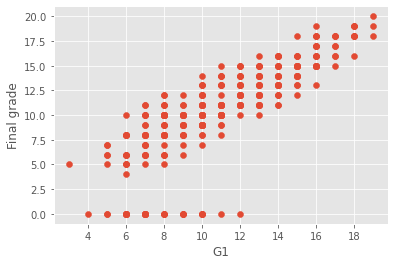

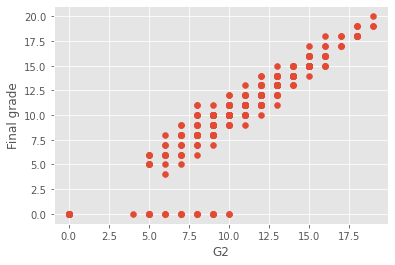

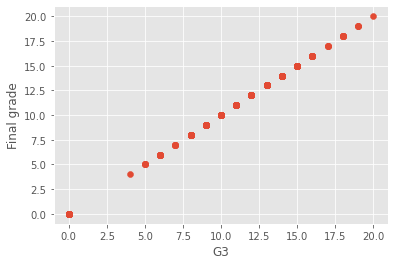

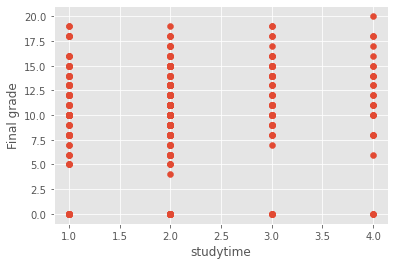

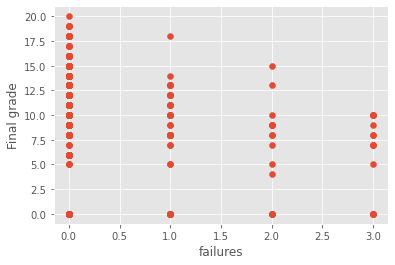

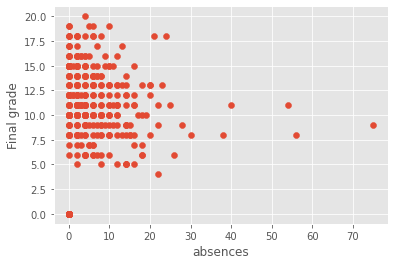

<Figure size 432x288 with 0 Axes>

In [105]:
for feature in features:  
    style.use("ggplot")
    pyplot.scatter(data[feature], data["G3"])
    pyplot.xlabel(feature)
    pyplot.ylabel("Final grade")    
    pyplot.figure()
    
pyplot.show